In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt  

# jtplot.style(theme='solarizedl', context='notebook', ticks=True, grid=False)
# theme (str): 'oceans16', 'grade3', 'chesterish', 'onedork', 'monokai', 'solarizedl', 'solarizedd'

## Step 1: combine all data in one df

In [4]:
from platform import python_version

In [2]:
a=pd.read_csv("RWS_data/2021/IVS_weekmonitor_04FEB2021.csv", sep=';', parse_dates=[4])

In [3]:
#first identify all files in 2021 folder and save their names
from os import walk
f = []
for (dirpath, dirnames, filenames) in walk('RWS_data/2021'):
    f.extend(filenames)
    break

In [4]:
#empty list to store data
li=[]

#read everything in as object for now
for filename in f:    
    df = pd.read_csv("RWS_data/2021/"+str(filename), sep=';', index_col=None, header=0, dtype=object)
    if filename != 'IVS_weekmonitor_04FEB2021.csv':
        df.v05_06_begindt_evenement_iso=df.v05_06_begindt_evenement_iso.astype(str)
        for i in df.index:
            df.v05_06_begindt_evenement_iso[i]=parse(df.v05_06_begindt_evenement_iso[i])
        
        df.rename(columns={'v05_06_begindt_evenement_iso':'Date'}, inplace=True)
        
    else:
        df.rename(columns={'v05_06_Begindt_evenement':'Date'},inplace=True)
        
    print(filename,'handled')
    li.append(df)

#create df
df_2021 = pd.concat(li, axis=0, ignore_index=True)

IVS_weekmonitor_02SEP2021.csv handled
IVS_weekmonitor_03JAN2022.csv handled
IVS_weekmonitor_04FEB2021.csv handled
IVS_weekmonitor_04MAR2021.csv handled
IVS_weekmonitor_05AUG2021.csv handled
IVS_weekmonitor_05DEC2021.csv handled
IVS_weekmonitor_05JUL2021.csv handled
IVS_weekmonitor_05JUN2021.csv handled
IVS_weekmonitor_05MAY2021.csv handled
IVS_weekmonitor_05NOV2021.csv handled
IVS_weekmonitor_05OCT2021.csv handled
IVS_weekmonitor_15APR2021.csv handled


In [5]:
#save data
df_2021.to_csv("RWS_data/2021/2021_combined.csv")

## Step 2: data cleaning

In [3]:
df_2021 = pd.read_csv('RWS_data/2021/2021_combined.csv', index_col=0, header=0)

In [4]:
#check data types
df_2021.dtypes

Jaarmaand                   int64
Jaar                        int64
Maand                       int64
Weeknr                      int64
Date                       object
UNLO_herkomst              object
UNLO_bestemming            object
v15_1_Scheepstype_RWS       int64
SK_CODE                    object
v18_Laadvermogen          float64
v28_Beladingscode           int64
v38_Vervoerd_gewicht      float64
v30_4_Containers_TEU_S      int64
nstr_nw                   float64
nst2007_nw                 object
dtype: object

In [5]:
#Convert date to datetime format
df_2021.Date = pd.to_datetime(df_2021.Date, utc=True)

In [6]:
#sort by date
df_2021.sort_values(by='Date', inplace = True)
df_2021.reset_index(drop=True, inplace = True)

In [7]:
#only keep 2021 values
df_2021=df_2021.loc[df_2021.Jaar == 2021]

In [11]:
#check length to see if dropping duplicates works
print(len(df_2021))

385572


In [12]:
#drop duplicates
df_2021.drop_duplicates(keep='first', inplace=True)
print(len(df_2021))

385572


In [13]:
#save data
df_2021.to_csv("RWS_data/2021/2021_combined.csv")

## EDA

In [2]:
import seaborn as sns

In [3]:
#read in cleaned data
df_2021 = pd.read_csv('RWS_data/2021/2021_combined.csv', index_col=0, header=0, parse_dates=['Date'])

In [43]:
df_2021.rename(columns={'Weeknr':'Week_no','UNLO_herkomst':'Origin','UNLO_bestemming':'Destination','v15_1_Scheepstype_RWS':'Type_code_ship','v18_Laadvermogen':'Transport_capacity','v38_Vervoerd_gewicht':'Transported_weight','v30_4_Containers_TEU_S':'Transported_containers'}, inplace=True)

In [44]:
df_2021.head()

,Jaarmaand,Jaar,Maand,Week_no,Date,Origin,Destination,Type_code_ship,SK_CODE,Transport_capacity,v28_Beladingscode,Transported_weight,Transported_containers,nstr_nw,nst2007_nw,hour
0,2101,2021,1,53,2021-01-01 00:00:00+00:00,NLAMS,BEANR,2,M12,8000.0,3,0.0,0,3.0,7.4,0
1,2101,2021,1,53,2021-01-01 00:00:00+00:00,DEGDO,BEANR,2,M8,2860.0,3,0.0,0,3.0,7.4,0
2,2101,2021,1,53,2021-01-01 00:00:00+00:00,NLVLI,BEWND,2,M9,3520.0,7,3000000.0,0,3.0,7.2,0
3,2101,2021,1,53,2021-01-01 00:00:00+00:00,DEHBO,NLRTM,2,M8,1740.0,7,500000.0,0,8.0,8.2,0
4,2101,2021,1,53,2021-01-01 00:00:00+00:00,NLAMS,DEDUI,16,BIIa-1,2510.0,7,2004000.0,0,3.0,7.2,0


In [45]:
df_2021.tail()

,Jaarmaand,Jaar,Maand,Week_no,Date,Origin,Destination,Type_code_ship,SK_CODE,Transport_capacity,v28_Beladingscode,Transported_weight,Transported_containers,nstr_nw,nst2007_nw,hour
385567,2112,2021,12,52,2021-12-31 22:00:00+00:00,DEDMG,BEGNE,16,BIIa-1,3550.0,3,0.0,0,3.0,7.4,22
385568,2112,2021,12,52,2021-12-31 22:00:00+00:00,NLRTM,BEGNE,2,M10,3940.0,7,3392000.0,0,3.0,7.2,22
385569,2112,2021,12,52,2021-12-31 22:00:00+00:00,DEMHG,BEANR,2,M9,3510.0,3,0.0,0,3.0,7.2,22
385570,2112,2021,12,52,2021-12-31 22:00:00+00:00,NLRTM,BEGNE,2,M9,4290.0,7,2000000.0,0,8.0,8.5,22
385571,2112,2021,12,52,2021-12-31 22:00:00+00:00,FRSXB,NLNIJ,9,C3l,3430.0,7,2178061.0,153,9.0,19.2,22


In [46]:
df_2021.iloc[:,3:].describe().round(1)

,Week_no,Type_code_ship,Transport_capacity,v28_Beladingscode,Transported_weight,Transported_containers,nstr_nw,hour
count,385572.0,385572.0,385572.0,385572.0,278134.0,385572.0,274888.0,385572.0
mean,26.5,3.0,2445.8,4.8,1243360.3,14.5,5.6,12.1
std,15.0,5.3,2521.1,2.7,1583801.5,50.8,2.8,5.6
min,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,14.0,1.0,1100.0,1.0,242000.0,0.0,3.0,8.0
50%,26.0,1.0,1820.0,7.0,996000.0,0.0,6.0,12.0
75%,40.0,2.0,3160.0,7.0,1700000.0,0.0,8.0,16.0
max,53.0,36.0,100000.0,7.0,99999000.0,1700.0,9.0,23.0


### Seasonality?

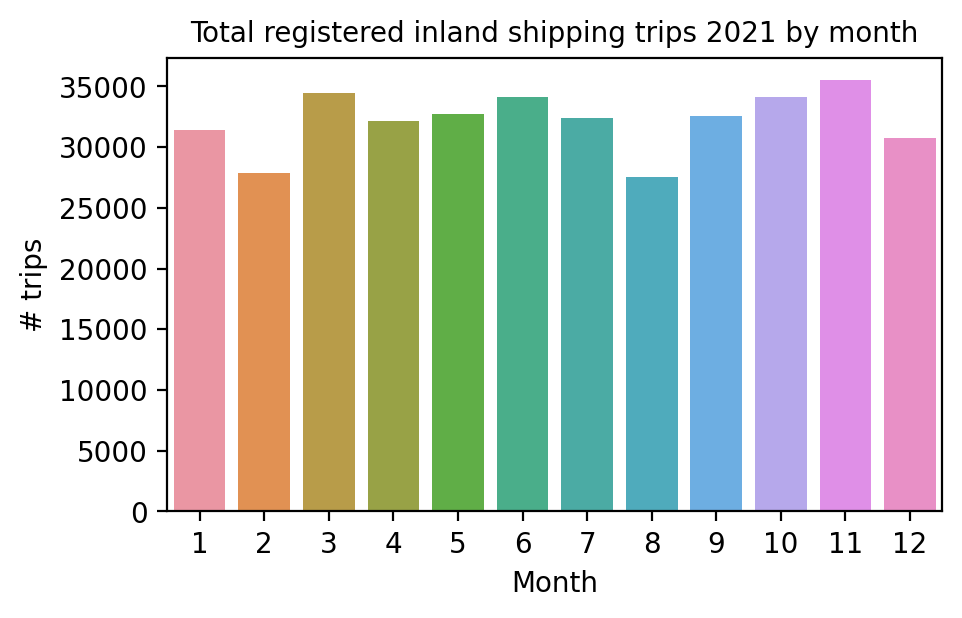

In [48]:
count = df_2021.groupby(by='Maand').count()
fig, ax = plt.subplots(dpi=200, figsize=(5,3))
# colors=sns.color_palette('colorblind')
sns.barplot(x=count.index, y=count.Jaarmaand, ax=ax)
plt.title('Total registered inland shipping trips 2021 by month', fontsize=10)
ax.set_xlabel("Month")
ax.set_ylabel("# trips")
plt.show()

Text(0, 0.5, 'Total transported weight [tonnes]')

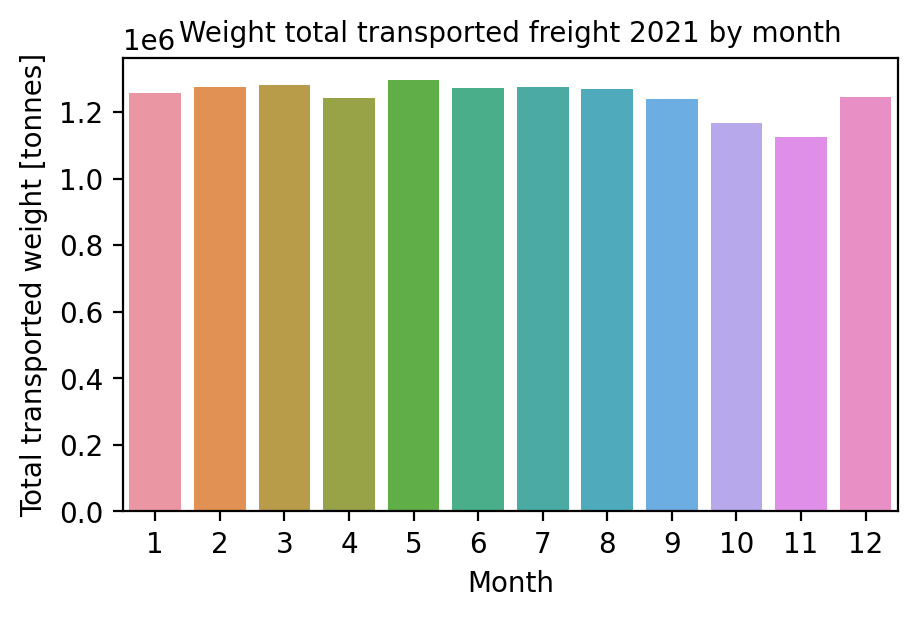

In [32]:
mean = df_2021.groupby(by='Maand').mean()
fig, ax = plt.subplots(dpi=200, figsize=(5,3))
sns.barplot(x=mean.index, y=mean.v38_Vervoerd_gewicht)
plt.title('Weight total transported freight 2021 by month', fontsize=10)
ax.set_xlabel("Month")
ax.set_ylabel("Total transported weight [tonnes]")

In [29]:
count = df_2021.groupby(by='v28_Beladingscode').count()
# fig, ax = plt.subplots(dpi=200, figsize=(5,3))
# sns.barplot(x=mean.index, y=mean.v38_Vervoerd_gewicht)
# plt.title('Weight total transported freight 2021 by month', fontsize=10)

,Jaarmaand,Jaar,Maand,Weeknr,Date,UNLO_herkomst,UNLO_bestemming,v15_1_Scheepstype_RWS,SK_CODE,v18_Laadvermogen,v38_Vervoerd_gewicht,v30_4_Containers_TEU_S,nstr_nw,nst2007_nw,hour
v28_Beladingscode,,,,,,,,,,,,,,,
1,107438,107438,107438,107438,107438,107438,107438,107438,105992,107438,0,107438,7,7,107438
3,35803,35803,35803,35803,35803,35803,35803,35803,35728,35803,35803,35803,35763,35763,35803
5,20886,20886,20886,20886,20886,20886,20886,20886,20859,20886,20886,20886,20570,20561,20886
7,221445,221445,221445,221445,221445,221445,221445,221445,220998,221445,221445,221445,218548,217234,221445


### Most frequented destinations

In [12]:
df_2021

,Jaarmaand,Jaar,Maand,Weeknr,Date,UNLO_herkomst,UNLO_bestemming,v15_1_Scheepstype_RWS,SK_CODE,v18_Laadvermogen,v28_Beladingscode,v38_Vervoerd_gewicht,v30_4_Containers_TEU_S,nstr_nw,nst2007_nw
0,2101,2021,1,53,2021-01-01 00:00:00+00:00,NLAMS,BEANR,2,M12,8000.0,3,0.0,0,3.0,7.4
1,2101,2021,1,53,2021-01-01 00:00:00+00:00,DEGDO,BEANR,2,M8,2860.0,3,0.0,0,3.0,7.4
2,2101,2021,1,53,2021-01-01 00:00:00+00:00,NLVLI,BEWND,2,M9,3520.0,7,3000000.0,0,3.0,7.2
3,2101,2021,1,53,2021-01-01 00:00:00+00:00,DEHBO,NLRTM,2,M8,1740.0,7,500000.0,0,8.0,8.2
4,2101,2021,1,53,2021-01-01 00:00:00+00:00,NLAMS,DEDUI,16,BIIa-1,2510.0,7,2004000.0,0,3.0,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385567,2112,2021,12,52,2021-12-31 22:00:00+00:00,DEDMG,BEGNE,16,BIIa-1,3550.0,3,0.0,0,3.0,7.4
385568,2112,2021,12,52,2021-12-31 22:00:00+00:00,NLRTM,BEGNE,2,M10,3940.0,7,3392000.0,0,3.0,7.2
385569,2112,2021,12,52,2021-12-31 22:00:00+00:00,DEMHG,BEANR,2,M9,3510.0,3,0.0,0,3.0,7.2
385570,2112,2021,12,52,2021-12-31 22:00:00+00:00,NLRTM,BEGNE,2,M9,4290.0,7,2000000.0,0,8.0,8.5


In [13]:
dests = df_2021.groupby(by='UNLO_bestemming').count().sort_values('Jaarmaand',ascending=False)[:10]
depa = df_2021.groupby(by='UNLO_herkomst').count().sort_values('Jaarmaand',ascending=False)[:10]

dests_20 = df_2021.groupby(by='UNLO_bestemming').count().sort_values('Jaarmaand',ascending=False)[:20]
depa_20 = df_2021.groupby(by='UNLO_herkomst').count().sort_values('Jaarmaand',ascending=False)[:20]

In [14]:
print("Share of top 10 dests =", (dests.Jaarmaand.sum()/len(df_2021)*100))
print("Share of top 10 depa =", (dests.Jaarmaand.sum()/len(df_2021)*100))

print("Share of top 20 dests =", (dests_20.Jaarmaand.sum()/len(df_2021)*100))
print("Share of top 20 depa =", (dests_20.Jaarmaand.sum()/len(df_2021)*100))

Share of top 10 dests = 42.457958565455996
Share of top 10 depa = 42.457958565455996
Share of top 20 dests = 49.96187482493542
Share of top 20 depa = 49.96187482493542


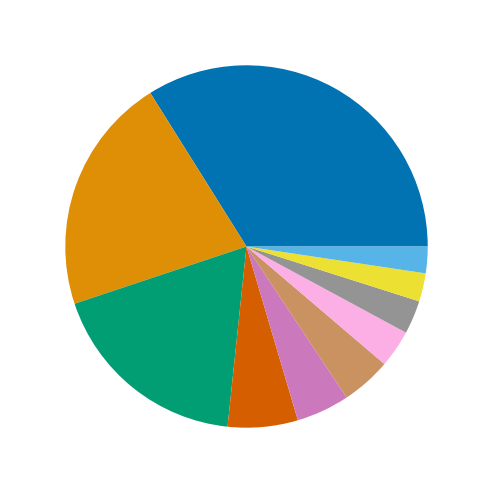

In [15]:
fig, ax = plt.subplots(dpi=200, figsize=(5,3))
colors = sns.color_palette('colorblind')
ax = plt.pie(dests.Jaarmaand, colors=colors)
plt.show()

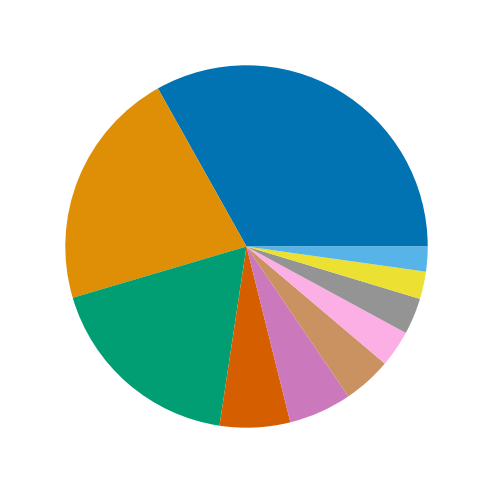

In [16]:
fig, ax = plt.subplots(dpi=200, figsize=(5,3))
colors = sns.color_palette('colorblind')
ax = plt.pie(depa.Jaarmaand, colors=colors)
plt.show()

### All trips ranked by mostly executed

In [17]:
all_trips_ranked=df_2021.groupby(by=['UNLO_herkomst','UNLO_bestemming']).count().reset_index().sort_values(by='Jaarmaand',ascending=False).iloc[:,:3].reset_index(drop=True)
all_trips_ranked['Percentage_total_trips']=(all_trips_ranked['Jaarmaand']/len(df_2021))*100

In [18]:
all_trips_ranked.head(20)

,UNLO_herkomst,UNLO_bestemming,Jaarmaand,Percentage_total_trips
0,BEANR,NLRTM,9816,2.545828
1,NLRTM,BEANR,8938,2.318114
2,NLRTM,NLAMS,4988,1.293662
3,NLAMS,NLRTM,4972,1.289513
4,BEANR,BEGNE,3441,0.892440
5,BEANR,NLAMS,2093,0.542830
6,BEGNE,BEANR,2024,0.524934
7,NLAMS,BEANR,1798,0.466320
8,NLRTM,NLRTM,1796,0.465801
9,NLVLI,BEANR,1720,0.446090


In [19]:
df_2021.Date[0]

Timestamp('2021-01-01 00:00:00+0000', tz='UTC')

In [20]:
df_2021['hour']=df_2021.Date.apply(lambda i: i.hour)

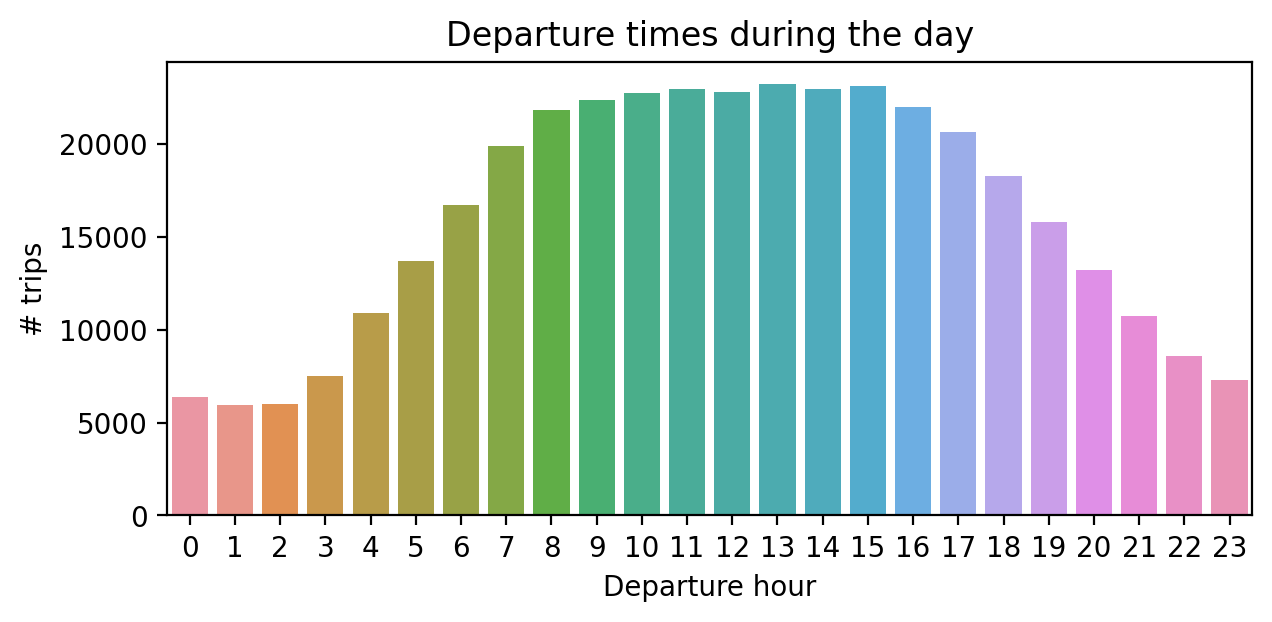

In [47]:
fig, ax = plt.subplots(dpi=200, figsize=(7,3))
sns.barplot(x=df_2021.groupby(by='hour').count().Jaarmaand.index, y=df_2021.groupby(by='hour').count().Jaarmaand.values, ax=ax)
plt.title('Departure times during the day')
ax.set_xlabel('Departure hour')
ax.set_ylabel('# trips')
plt.show()

## Get network

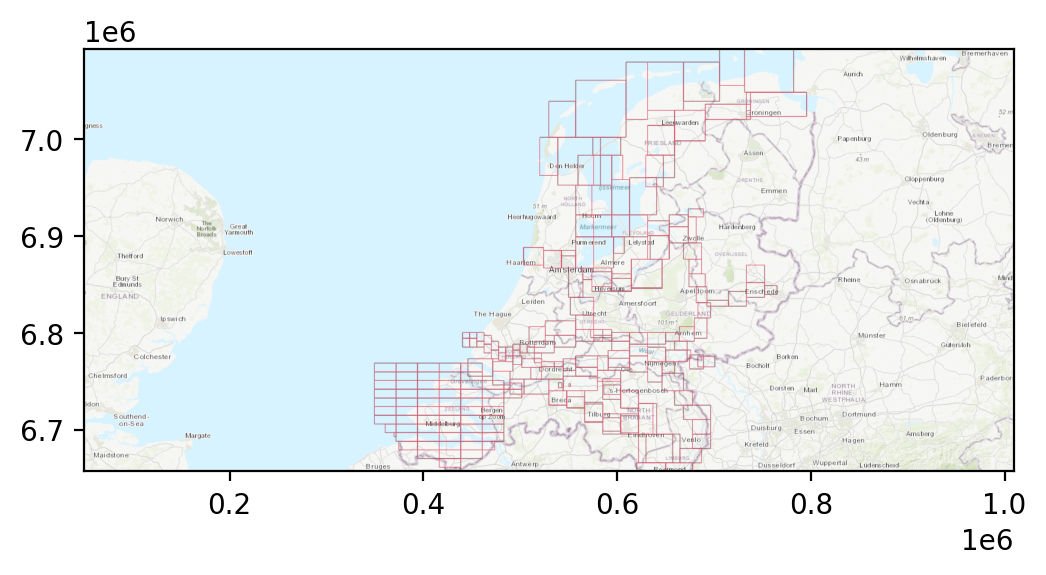

<AxesSubplot:>

In [4]:

import rasterio
from rasterio.plot import show
ax,fig = plt.subplots(dpi=200)
fp = r'RWS_data/River_network.tif'
img = rasterio.open(fp)
show(img)

In [ ]:
import osmnx as ox
ox.config(use_cache=True, log_console=True)
G = ox.graph_from_place('Netherlands', retain_all=False, truncate_by_edge=False,
                        simplify=True, custom_filter='["harbour=yes|landuse=port|landuse=industrial~industrial=port"]')
fig, ax = ox.plot_graph(G)

C:\Users\Fabia\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [29]:
keys=[]
for i,j in enumerate(G.edges):
    keys+=list(G.edges(keys=True, data=True))[i][3].keys()
set(keys)

{'geometry',
 'length',
 'maxspeed',
 'name',
 'oneway',
 'osmid',
 'tunnel',
 'width'}

In [25]:
keys

array([], dtype=float64)

In [11]:
G.edges

OutMultiEdgeView([(46367195, 251823620, 0), (60739108, 60742002, 0), (60739108, 324835709, 0), (60739108, 237852506, 0), (60740168, 323968073, 0), (60740168, 331960285, 0), (60740168, 331960285, 1), (60740168, 331960285, 2), (60740168, 331960285, 3), (60740168, 117738509, 0), (60740843, 117738457, 0), (60740843, 251749021, 0), (60740843, 178261171, 0), (60740852, 60742002, 0), (60740852, 117953820, 0), (60740852, 5713701424, 0), (60740852, 178261156, 0), (60742002, 60740852, 0), (60742002, 60739108, 0), (60742002, 117738490, 0), (60742002, 117738503, 0), (117738457, 60740843, 0), (117738457, 154546029, 0), (117738457, 2167126917, 0), (117738457, 370883189, 0), (117738466, 2167126916, 0), (117738466, 251749021, 0), (117738466, 2167126917, 0), (117738475, 117738484, 0), (117738475, 2167126916, 0), (117738475, 154515615, 0), (117738484, 154538128, 0), (117738484, 117738490, 0), (117738484, 117738475, 0), (117738490, 154538128, 0), (117738490, 60742002, 0), (117738490, 117738484, 0), (1177

In [ ]:
import osmnx as ox
ox.config(use_cache=True, log_console=True)
G = ox.graph_from_place('Amsterdam', retain_all=False, truncate_by_edge=False,
                        simplify=True, custom_filter='["waterway"~"canals"|rivers]')
fig, ax = ox.plot_graph(G)

In [ ]:
ox.graph_from_place?